#### Importando bibliotecas que auxiliarão no desenvolvimento do código 

In [2]:
import pandas as pd
import matplotlib as plt
import datetime as dt

#### Fazendo a leitura dos dados

In [3]:
url = r'C:\Users\beatr\OneDrive\Área de Trabalho\ProgramaBolsas\Sprint3\desafio\googleplaystore.csv'
df = pd.read_csv(url)

#### Removendo dados duplicados 

In [4]:
df = df.drop_duplicates()

#### Criação da função *limpar_converter* para aplicar nos demais exercícios abaixo (tratamento)


In [5]:
def limpar_converter(valor):
    if isinstance(valor,str):
        valor = valor.replace('+','').replace(',','').replace('$','').replace('.0M','000000')
        try:
            return float(valor)
        except ValueError:
            return None
    return valor

#### 2) quais são os 5 apps com maior número de instalações
##### Tratando os dados da coluna Install para poder analisar 

In [51]:
df['Installs'] = df['Installs'].apply(limpar_converter)

##### Organizando os dados em ordem decrescente para depois pegar apenas os 5 primeiros

In [52]:
df = df.sort_values(by='Installs',ascending=False)
selecao = df[['App','Installs']].head(5)

##### Criação do gráfico de barra para mostrar a análise

<Axes: title={'center': '5 apps com o maior número de instalações'}, xlabel='App'>

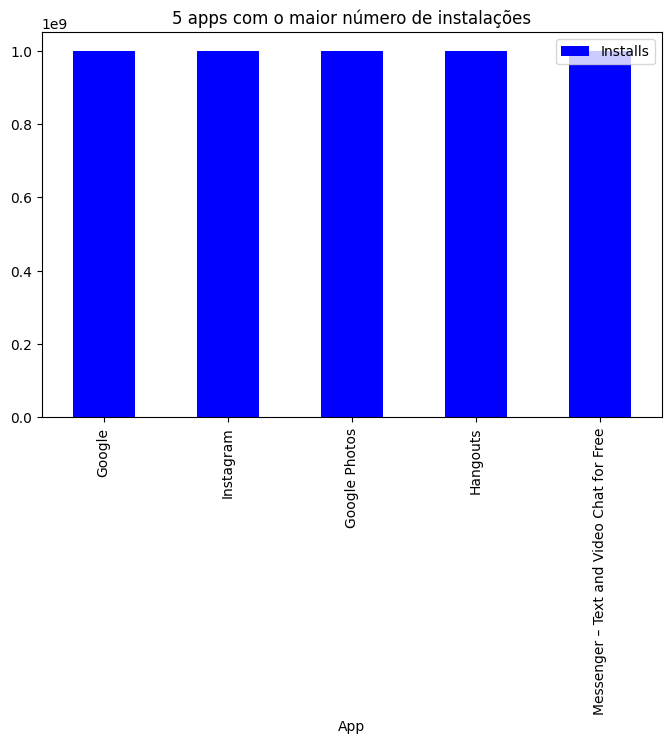

In [53]:
selecao.plot(kind='bar', x= 'App',y = 'Installs',figsize=(8,5),color='blue',title='5 apps com o maior número de instalações')

#### 3) As categorias de apps de acordo com a frequência que eles aparecem e crie um gráfico pizza em cima da análise feita. Peguei apenas os 15 primeiros, pois muitos valores eram pequenos e deixaram o gráfico ruim de visualizar.

<Axes: ylabel='count'>

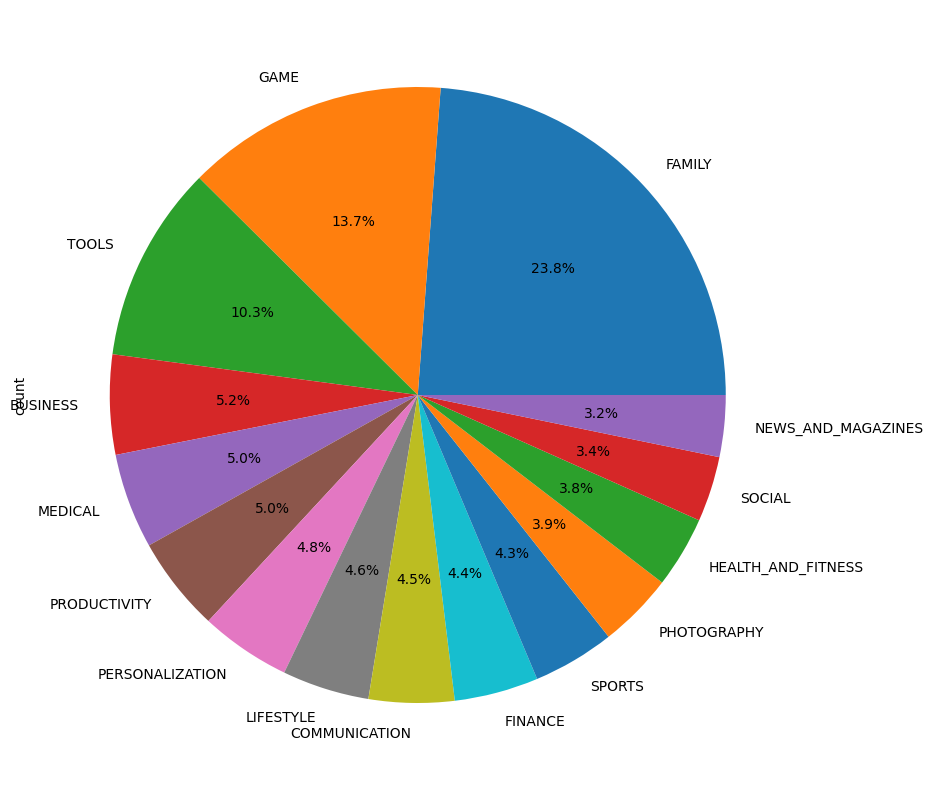

In [62]:
selecao = df['Category'].value_counts().head(15)

selecao.plot(kind='pie', figsize=(10,10), color='green',autopct='%1.1f%%')


#### 4) Qual o app mais caro do dataframe.
##### Iniciei tratando os dados

In [10]:
df['Price'] = df['Price'].apply(limpar_converter)

##### Após tratar, eu pude colocar os dados em ordem decrescente para pegar o valor mais alto 

In [11]:
selecao = df.sort_values(by='Price', ascending=False)
selecao[['App','Price']].head(1)

,App,Price
4367,I'm Rich - Trump Edition,400.0


#### 5) Quantos apps são classificados como 'Mature 17+'
##### Comecei selecionando apenas as linhas que correspondiam com *'Mature 17+'*. Como tinha muitos apps duplicados, utilizei o *unique* para pegar valores únicos e depois fiz a contagem com *len*

In [55]:
selecao = df['Content Rating'] == 'Mature 17+'
apps = df[selecao]['App'].unique()
quantidade = len(apps)
quantidade

393

#### 6) Top 10 apps por número de reviews
##### Iniciei tratando a coluna *Review*

In [13]:
df['Reviews'] = df['Reviews'].apply(limpar_converter)

##### Após tratar, pude dar sequência ordenando a coluna em ordem decrescente e pegando apenas os 10 maiores valores.

In [ ]:
selecao = df.sort_values(by='Reviews', ascending=False)
resultado = selecao[['App', 'Reviews']].drop_duplicates(subset='App').head(10)
resultado

,App,Reviews
2544,Facebook,78158306.0
336,WhatsApp Messenger,69119316.0
2604,Instagram,66577446.0
382,Messenger – Text and Video Chat for Free,56646578.0
1879,Clash of Clans,44893888.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1872,Subway Surfers,27725352.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
1878,Clash Royale,23136735.0


### Exercício 7 e 8
##### O exercício 7 e 8 pedia apenas que fizéssemos mais duas análises com gráfico de acordo com a nossa escolha. Eu escolhi pegar os 10 apps mais desatualizados.Segui o mesmo raciocínio dos demais execícios, coloquei a coluna em ordem crescente, peguei apenas os 10 primeiros e após isso, criei o gráfico de linha.

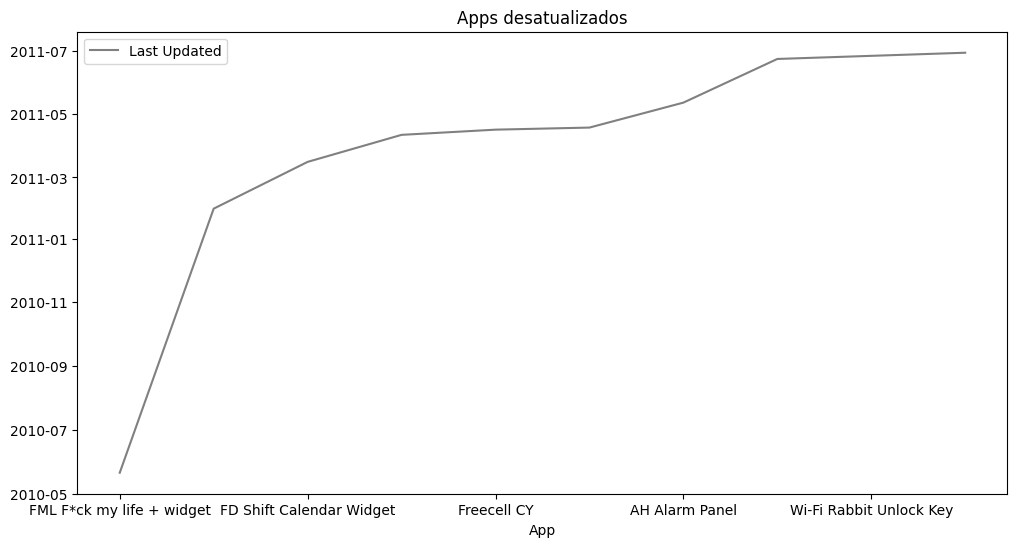

In [65]:
selecao = df.sort_values(by='Last Updated',ascending=True)
resultado = selecao[['App','Last Updated']].head(10)
grafico = resultado.plot(kind='line',x='App',y='Last Updated',figsize=(12,6),color='gray',title='Apps desatualizados')

### Segunda parte do exercício 7 e 8
##### Na segunda análise, eu escolhi pegar o maior review do dataset. Como escolhi o gráfico de dispersão, eu decidi comparar esse maior valor com os demais.

In [56]:
selecao = df['Reviews'].describe()
max = selecao.loc['max']
max

np.float64(78158306.0)

##### Comparando o valor com os demais e criando o gráfico para uma melhor visualização da disparidade.

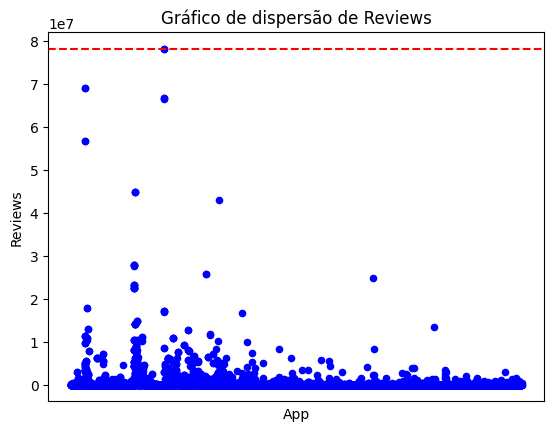

In [57]:
selecao = df['Reviews'].describe()
max = selecao.loc['max']
reviews = df['Reviews'].sort_values(ascending=False)
apps = df['App']

dados = pd.DataFrame({
    'Reviews': reviews,
    'Máximo': [max] * len(reviews),
    'App': apps
})

grafico = dados.plot(kind='scatter',x='App', y='Reviews',color='blue',title='Gráfico de dispersão de Reviews',xticks=(),legend=True)
grafico.axhline(y=max,color='red',linestyle='--',label='Maior Review')